### Please help by upvoting this kernel if you feel useful. 
It will motivate me to keep publishing.

This Note book will be easy for who is new to data science libraries. 
I'm importing libraries when ever it is needed, so it will be easy to relate each.

**Problem Statement : **

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

**Step 1:** Define the problem and expected output. Break down the problem into simple steps.
1. End Goal ->  Forcast total amount of products sold in every shop for the next month
2. Notes -> list of shops and products slightly changes every month

**Step 2:** Load the data. 
Here I'm using popular data loading library pandas.

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

path = "/kaggle/input/competitive-data-science-predict-future-sales/"

items = pd.read_csv(path+'/items.csv')
item_cats = pd.read_csv(path+'/item_categories.csv')
shops = pd.read_csv(path+'/shops.csv')
sales = pd.read_csv(path+'/sales_train.csv')
test = pd.read_csv(path+'/test.csv')
submission = pd.read_csv(path+'/sample_submission.csv')

print("Data set loaded successfully.")


Data set loaded successfully.


**Step 2:** Get an idea about the data structure.
Here I'm using few different commands to list columns in pands dataframe.
*DataFrame is like a table structure which is having list of columns with data

In [2]:
print(items.info())
print('Items : \n\t'+'\n\t'.join(list(items)))
print('ItemsCatagories : \n\t'+'\n\t'.join(list(item_cats.columns.values)))
print('Shops : \n\t'+'\n\t'.join(shops.columns.tolist()))
print('Sales : \n\t'+'\n\t'.join(sales.columns.tolist()))
## you will get above data set along with row data of sales only in real world senario.
## based on those, Usually we have to create our training and test data set based on our model which we are going to use 
## Here they giving us and test data set where we can directly use and the sales data we can use for training the model
print('TestSet : \n\t'+'\n\t'.join(list(test)))
print('Output : \n\t'+'\n\t'.join(list(submission)))

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
Items : 
	item_name
	item_id
	item_category_id
ItemsCatagories : 
	item_category_name
	item_category_id
Shops : 
	shop_name
	shop_id
Sales : 
	date
	date_block_num
	shop_id
	item_id
	item_price
	item_cnt_day
TestSet : 
	ID
	shop_id
	item_id
Output : 
	ID
	item_cnt_month
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


Now you have clear idea about what is this data about. For getting more idea about data we will try to visualize this data.

**Step 3:** Visualize data. First try to visualize some random samples extracted from the data. I'm using different methods which we can use to visualize data in tabular way.

In [3]:
print("Items")
print(items.head(2))
print("\nItem Catagerios")
print(item_cats.tail(2))
print("\nShops")
print(shops.sample(n=2))
print("\nTraining Data Set")
print(sales.sample(n=3,random_state=1))
print("\nTest Data Set")
print(test.sample(n=3,random_state=1))

Items
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   

   item_category_id  
0                40  
1                76  

Item Catagerios
           item_category_name  item_category_id
82  Чистые носители (штучные)                82
83           Элементы питания                83

Shops
                      shop_name  shop_id
26  Москва ТЦ "Ареал" (Беляево)       26
31      Москва ТЦ "Семеновский"       31

Training Data Set
               date  date_block_num  shop_id  item_id  item_price  \
651498   12.07.2013               6       37    11691       149.0   
460637   18.05.2013               4       25     4302       649.0   
1696749  18.05.2014              16       47     1306       299.0   

         item_cnt_day  
651498            1.0  
460637            1.0  
1696749           1.0  

Test Data Set
            ID  shop_id  item_id
1

After seeing this dataset we can catagerioze this data to meta data and effective data.
So, shop_names and item names, we don't care much. We can have a shop and item combined id and the
 sales data for the analyze further.

Final goal to predict sales, so we can ignore names of the products. we are interested in item count in a date time series. And price also can be a factor for the sales.

So, Try to plot some data which is relavant. 
Before plotting anything it is better to get an idea about the boundaries of the data set.
]

As we can see, simple way to address this is to use sales data and try to group and summarize those.
For the conveniet purpose we will split date column to year and month

In [4]:
from datetime import datetime
sales['year'] = pd.to_datetime(sales['date']).dt.strftime('%Y')
sales['month'] = sales.date.apply(lambda x: datetime.strptime(x,'%d.%m.%Y').strftime('%m')) #another way for same thing

sales.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
0,02.01.2013,0,59,22154,999.0,1.0,2013,01
1,03.01.2013,0,25,2552,899.0,1.0,2013,01


Let's try to plot sales for every year, to understand about seosaonal data

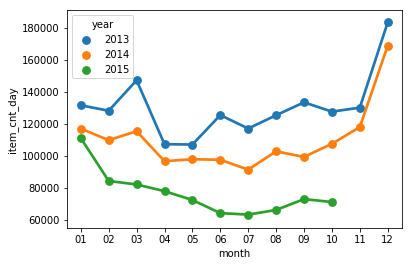

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#will make your plot outputs appear and be stored within the notebook.
%matplotlib inline 

grouped = pd.DataFrame(sales.groupby(['year','month'])['item_cnt_day'].sum().reset_index())
sns.pointplot(x='month', y='item_cnt_day', hue='year', data=grouped)


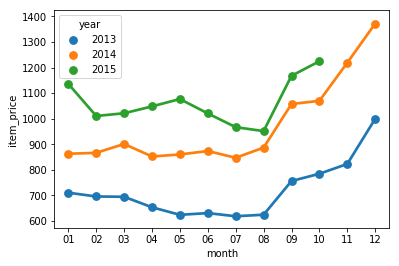

In [6]:
#Price
grouped_price = pd.DataFrame(sales.groupby(['year','month'])['item_price'].mean().reset_index())
sns.pointplot(x='month', y='item_price', hue='year', data=grouped_price)


By seeing this graph we can see that
1. last two months of the year having more sales.
2. 2015, we are expecting more sales.

Let's try to draw Total sales along with the linear month period time.

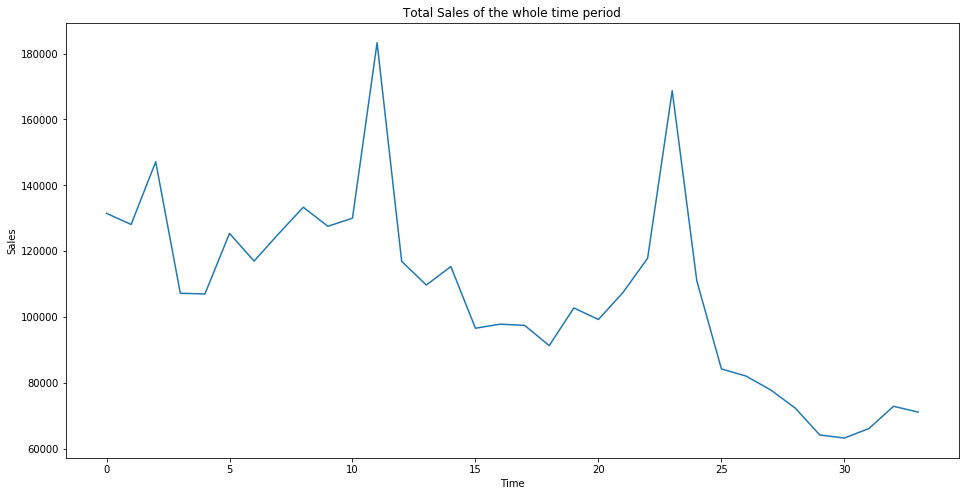

In [7]:
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the whole time period')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

Check the distribution, for detectiting outliers

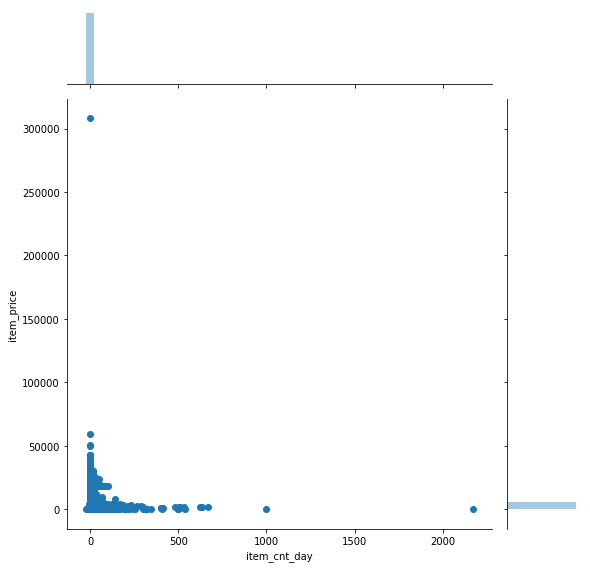

In [8]:
sns.jointplot(x="item_cnt_day", y="item_price", data=sales, height=8)
plt.show()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

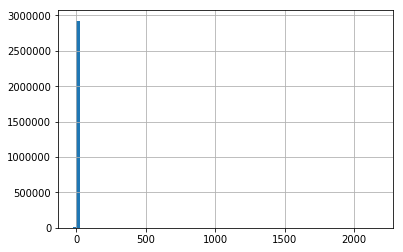

In [9]:
sales.item_cnt_day.hist(bins=100)
sales.item_cnt_day.describe()

As we can see, "item_cnt_day" > 125 and < 0, "item_price" >= 75000  we can treat as outliers,
In data cleaing stage we will remove those items.

**Step 4: Data Cleaning**

Filter incorrect data. Eg:  
1. Item price is equal to 0
2. data not in the test set given
3. Remove outliers

In [10]:
print('Data set size before remove item price 0 cleaning:', sales.shape)
sales = sales.query('item_price > 0')
print('Data set size after remove item price 0 cleaning:', sales.shape)

Data set size before remove item price 0 cleaning: (2935849, 8)
Data set size after remove item price 0 cleaning: (2935848, 8)


In [11]:
print('Data set size before filter valid:', sales.shape)
# Only shops that exist in test set.
sales = sales[sales['shop_id'].isin(test['shop_id'].unique())]
# Only items that exist in test set.
sales = sales[sales['item_id'].isin(test['item_id'].unique())]
print('Data set size after filter valid:', sales.shape)

Data set size before filter valid: (2935848, 8)
Data set size after filter valid: (1224439, 8)


In [12]:
print('Data set size before remove outliers:', sales.shape)
sales = sales.query('item_cnt_day >= 0 and item_cnt_day <= 125 and item_price < 75000')
print('Data set size after remove outliers:', sales.shape)

Data set size before remove outliers: (1224439, 8)
Data set size after remove outliers: (1221451, 8)


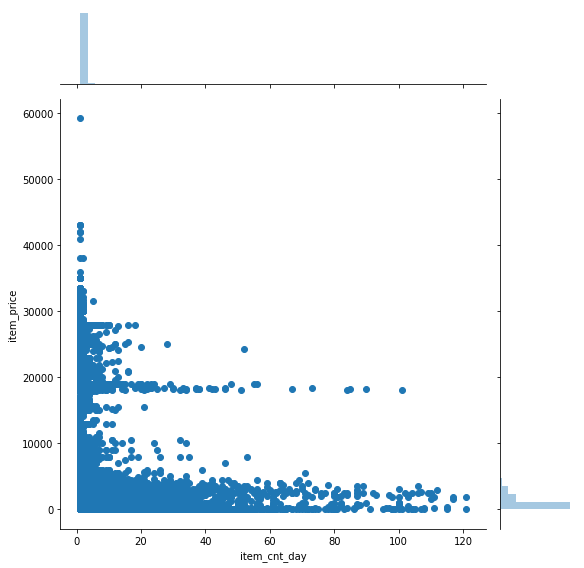

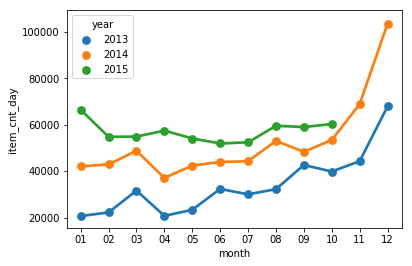

In [13]:
#After cleaning plot
sns.jointplot(x="item_cnt_day", y="item_price", data=sales, height=8)
plt.show()

cleaned = pd.DataFrame(sales.groupby(['year','month'])['item_cnt_day'].sum().reset_index())
sns.pointplot(x='month', y='item_cnt_day', hue='year', data=cleaned)

**Step 5:**  Data preprocessing. Identify features. This means, selecting only needed features and create the proper dataset for the processing.
We need to find out what are the features that will affect the sales
1. Price
2. Month
3. Year
4. Item catagory

Based on above features, sales can be vary. So, we will keep only the interested columns and drop others.

In [14]:
# Aggregate to monthly level the sales
monthly_sales=sales.groupby(["date_block_num","shop_id","item_id"])[
    "date_block_num","date","item_price","item_cnt_day"].agg({"date_block_num":'mean',"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

monthly_sales.head(5)

date_block_num        date              \
                                         mean         min         max   
date_block_num shop_id item_id                                          
0              2       33                   0  05.01.2013  05.01.2013   
                       482                  0  16.01.2013  16.01.2013   
                       491                  0  09.01.2013  09.01.2013   
                       839                  0  22.01.2013  22.01.2013   
                       1007                 0  11.01.2013  25.01.2013   

                               item_price item_cnt_day  
                                     mean          sum  
date_block_num shop_id item_id                          
0              2       33           499.0          1.0  
                       482         3300.0          1.0  
                       491          600.0          1.0  
                       839         3300.0          1.0  
                       1007         449.0          3.0

### Train the dataset

We will use LSTM(Long Short Term Memory) algorithum to model this time series data.
LSTM model will learn a function that maps a sequence of past observations as input to an output observation.

For this approach, we need to prapare our data set with input and output sequence.

Eg:  Let say we have monthly avarage sales as,  

[10, 20, 30, 40, 50, 60, 70, 80, 90]

We can divide the sequence into multiple input/output patterns called samples, where three time steps are used as input and one time step is used as output for the one-step prediction that is being learned.

            X		 y
    10, 20, 30		40
    20, 30, 40		50
    30, 40, 50		60

Our 'date_block_num' column will be the sequnce index, sales will be the value. 

In [15]:
sales_data_flat = monthly_sales.item_cnt_day.apply(list).reset_index()
#Keep only the test data of valid
sales_data_flat = pd.merge(test,sales_data_flat,on = ['item_id','shop_id'],how = 'left')
#fill na with 0
sales_data_flat.fillna(0,inplace = True)
sales_data_flat.drop(['shop_id','item_id'],inplace = True, axis = 1)
sales_data_flat.head(20)

,ID,date_block_num,sum
0,0,20.0,1.0
1,0,22.0,1.0
2,0,23.0,2.0
3,0,24.0,2.0
4,0,28.0,1.0
5,0,29.0,1.0
6,0,30.0,1.0
7,0,31.0,3.0
8,0,32.0,1.0
9,1,0.0,0.0


In [16]:
#We will create pivot table.
# Rows = each shop+item code
# Columns will be out time sequence
pivoted_sales = sales_data_flat.pivot_table(index='ID', columns='date_block_num',fill_value = 0,aggfunc='sum' )
pivoted_sales.head(20)

sum                                               ...       \
date_block_num 0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0   ... 24.0   
ID                                                                ...        
0                 0    0    0    0    0    0    0    0    0    0  ...    2   
1                 0    0    0    0    0    0    0    0    0    0  ...    0   
2                 0    0    0    0    0    0    0    0    0    0  ...    0   
3                 0    0    0    0    0    0    0    0    0    0  ...    0   
4                 0    0    0    0    0    0    0    0    0    0  ...    0   
5                 0    0    0    0    0    0    0    0    0    0  ...    1   
6                 0    0    0    0    0    0    0    0    0    0  ...    0   
7                 0    0    0    0    0    0    0    0    0    0  ...    0   
8                 0    0    0    0    0    0    0    0    0    0  ...    9   
9                 0    0    0    0    0    0    0    0    0    0  ...    0   
10                0    0    0    0    0    0    0    0    0    0  ...    4   
11                0    0    0    0    0    0    0    0    0    0  ...    0   
12                0    0    1    0    1    0    0    0    0    0  ...    0   
13                0    0    0    0    0    0    0    0    0    0  ...    3   
14                0    0    0    0    0    0    1    5    4    4  ...    7   
15                0    0    0    0    0    0    0    0    0    0  ...    4   
16                0    0    0    0    0    0    0    0    0    0  ...    0   
17                0    0    0    0    0    0    0    0    0    0  ...    0   
18                0    0    0    0    0    0    0    0    0    0  ...    0   
19                0    0    0    0    0    0    0    0    0    0  ...    0   

                                                             
date_block_num 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0  
ID                                                           
0                 0    0    0    1    1    1    3    1    0  
1                 0    0    0    0    0    0    0    0    0  
2                 0    0    0    3    2    0    1    3    1  
3                 0    0    0    0    0    0    1    0    0  
4                 0    0    0    0    0    0    0    0    0  
5                 0    0    0    3    0    0    0    1    1  
6                 0    0    0    0    0    0    0    3    2  
7                 0    1    0    0    1    0    0    0    0  
8                 2    3    2    2    4    3    2    3    0  
9                 0    0    0    0    0    0    0    0    0  
10                3    6    2    6    6    5    5    2    3  
11                0    0    0    0    0    0    0    1    0  
12                0    0    0    0    0    0    0    0    0  
13                3    1    0    0    3    1    1    0    0  
14                1    3    1    1    1    4    3    2    2  
15                1    7    1    6    1    1    2    1    6  
16                0    0    0    0    0    0    0    0    0  
17                0    0    0    0    1    0    0    0    0  
18                0    0    9    5    3    2    2    2    2  
19                0    0    0    0    0    0    0    0    0  

[20 rows x 34 columns]

**Step 6** : Spilit training,validation and test dataset.

In [17]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(pivoted_sales.values[:,:-1],axis = 2)
# the last column is our prediction
y_train = pivoted_sales.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(pivoted_sales.values[:,1:],axis = 2)

# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [18]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.models import load_model, Model

# our defining sales model 
sales_model = Sequential()
sales_model.add(LSTM(units = 64,input_shape = (33,1)))
#sales_model.add(LSTM(units = 64,activation='relu'))
sales_model.add(Dropout(0.5))
sales_model.add(Dense(1))

sales_model.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
sales_model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [19]:
sales_model.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
214200/214200 [==============================] - 31s 146us/step - loss: 5.8036 - mean_squared_error: 5.8036
Epoch 2/10
214200/214200 [==============================] - 32s 151us/step - loss: 5.5572 - mean_squared_error: 5.5572
Epoch 3/10
214200/214200 [==============================] - 31s 147us/step - loss: 5.3642 - mean_squared_error: 5.3642
Epoch 4/10
214200/214200 [==============================] - 31s 147us/step - loss: 5.2544 - mean_squared_error: 5.2544
Epoch 5/10
214200/214200 [==============================] - 32s 151us/step - loss: 5.1882 - mean_squared_error: 5.1882
Epoch 6/10
214200/214200 [==============================] - 32s 148us/step - loss: 5.1647 - mean_squared_error: 5.1647
Epoch 7/10
214200/214200 [==============================] - 33s 155us/step - loss: 5.0580 - mean_squared_error: 5.0580
Epoch 8/10
214200/214200 [==============================] - 33s 152us/step - loss: 5.0365 - mean_squared_error: 5.0365
Epoch 9/10
214200/214200 [======================

In [20]:
submission_output = sales_model.predict(X_test)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test['ID'],'item_cnt_month':submission_output.ravel()})
# creating csv file from dataframe
#submission.to_csv('submission.csv',index = False)
submission.to_csv('submission_stacked.csv',index = False)
submission.head()

,ID,item_cnt_month
0,0,0.448359
1,1,0.112115
2,2,0.795173
3,3,0.164107
4,4,0.112115


==================First stage Completed=============================

Expecting your feedback.

Thank you.